In [1]:
import os
from satpy import Scene, DatasetID
import glob
from satpy.multiscene import MultiScene
from satpy.writers import get_enhanced_image

import matplotlib.pyplot as plt
from matplotlib import patheffects

import cartopy.crs as ccrs
import cartopy.feature as cfeature

from datetime import datetime

In [2]:
def get_current_julian(Year,Month,Day):
    # Set the date you want to convert
    dt = datetime(Year,Month,Day)
    #dt = datetime.utcnow()

    # Start of year for reference
    d0 = datetime(Year, 1, 1)

    # Find the difference and add one to get the day number of the calander year
    delta = dt - d0
    Julian_Day = delta.days+1
    if Julian_Day < 100:
        Julian_Day = "0"+str(Julian_Day)
        if int(Julian_Day) < 10:
            Julian_Day = "0"+str(Julian_Day)

    Year = str('{0:%Y}'.format(dt))
    Month = str('{0:%m}'.format(dt))
    Day = str('{0:%d}'.format(dt))
    Hour = str('{0:%H}'.format(dt))
    Minute = str('{0:%m}'.format(dt))

    #'{0:%Y}'.format(dt)+"-"+'{0:%m}'.format(dt)+"-"+'{0:%d}'.format(dt)+"-"+'{0:%H}'.format(dt)
    print("date: ",Year+"-"+Month+"-"+Day)

    # Julian day (Day)
    print("Julian number: ",Julian_Day)
    return Year,Month,Day,Julian_Day

August 3 2018, from 00Z to 03Z

In [3]:
Year,Month,Day,Julian_Day = get_current_julian(2019,4,10)
Year,Month,Day,Julian_Day

date:  2019-04-10
Julian number:  100


('2019', '04', '10', 100)

In [4]:
Hour = "21"

In [59]:
GOES_sample_path = f"/Users/chowdahead/Downloads/GOES_Data/Airmass/TX/{Hour}/"
GOES_sample_path

'/Users/chowdahead/Downloads/GOES_Data/Airmass/TX/21/'

In [60]:
%%time

! rclone --include "OR_ABI-L1b-RadC-M6C01*.nc" copy Public-AWS:noaa-goes16/ABI-L1b-RadC/{Year}/{Julian_Day}/{Hour}/ {GOES_sample_path}
! rclone --include "OR_ABI-L1b-RadC-M6C02*.nc" copy Public-AWS:noaa-goes16/ABI-L1b-RadC/{Year}/{Julian_Day}/{Hour}/ {GOES_sample_path}
! rclone --include "OR_ABI-L1b-RadC-M6C03*.nc" copy Public-AWS:noaa-goes16/ABI-L1b-RadC/{Year}/{Julian_Day}/{Hour}/ {GOES_sample_path}

CPU times: user 6.24 s, sys: 1.98 s, total: 8.22 s
Wall time: 4min 59s


In [43]:
%%time

! rclone --include "OR_ABI-L1b-RadC-M6C11*.nc" copy Public-AWS:noaa-goes16/ABI-L1b-RadC/{Year}/{Julian_Day}/{Hour}/ {GOES_sample_path}
! rclone --include "OR_ABI-L1b-RadC-M6C13*.nc" copy Public-AWS:noaa-goes16/ABI-L1b-RadC/{Year}/{Julian_Day}/{Hour}/ {GOES_sample_path}
! rclone --include "OR_ABI-L1b-RadC-M6C14*.nc" copy Public-AWS:noaa-goes16/ABI-L1b-RadC/{Year}/{Julian_Day}/{Hour}/ {GOES_sample_path}
! rclone --include "OR_ABI-L1b-RadC-M6C15*.nc" copy Public-AWS:noaa-goes16/ABI-L1b-RadC/{Year}/{Julian_Day}/{Hour}/ {GOES_sample_path}

CPU times: user 1.38 s, sys: 446 ms, total: 1.82 s
Wall time: 1min 4s


In [28]:
! rclone --include "OR_ABI-L1b-RadC-*C13*.nc" ls Public-AWS:noaa-goes16/ABI-L1b-RadC/2019/100/18/

  4806089 OR_ABI-L1b-RadC-M6C11_G16_s20191001801177_e20191001803550_c20191001803599.nc
  4807984 OR_ABI-L1b-RadC-M6C11_G16_s20191001806177_e20191001808550_c20191001808597.nc
  4808839 OR_ABI-L1b-RadC-M6C11_G16_s20191001811177_e20191001813550_c20191001813597.nc
  4810236 OR_ABI-L1b-RadC-M6C11_G16_s20191001816177_e20191001818550_c20191001818598.nc
  4810572 OR_ABI-L1b-RadC-M6C11_G16_s20191001821177_e20191001823550_c20191001823598.nc
  4812155 OR_ABI-L1b-RadC-M6C11_G16_s20191001826177_e20191001828550_c20191001828597.nc
  4812006 OR_ABI-L1b-RadC-M6C11_G16_s20191001831177_e20191001833550_c20191001834000.nc
  4811964 OR_ABI-L1b-RadC-M6C11_G16_s20191001836177_e20191001838550_c20191001838598.nc
  4813144 OR_ABI-L1b-RadC-M6C11_G16_s20191001841177_e20191001843550_c20191001844000.nc
  4812950 OR_ABI-L1b-RadC-M6C11_G16_s20191001846177_e20191001848550_c20191001848598.nc
  4811895 OR_ABI-L1b-RadC-M6C11_G16_s20191001851177_e20191001853550_c20191001853598.nc
  4812652 OR_ABI-L1b-RadC-M6C11_G16_s201910

In [6]:
os.chdir(GOES_sample_path)

In [69]:
ls

00/
01/
02/
OR_ABI-L1b-RadC-M6C11_G16_s20191000001194_e20191000003567_c20191000004015.nc
OR_ABI-L1b-RadC-M6C11_G16_s20191000006194_e20191000008567_c20191000009016.nc
OR_ABI-L1b-RadC-M6C11_G16_s20191000011194_e20191000013567_c20191000014017.nc
OR_ABI-L1b-RadC-M6C11_G16_s20191000016194_e20191000018567_c20191000019015.nc
OR_ABI-L1b-RadC-M6C11_G16_s20191000021194_e20191000023567_c20191000024016.nc
OR_ABI-L1b-RadC-M6C11_G16_s20191000026194_e20191000028567_c20191000029015.nc
OR_ABI-L1b-RadC-M6C11_G16_s20191000031195_e20191000033567_c20191000034015.nc
OR_ABI-L1b-RadC-M6C11_G16_s20191000036195_e20191000038567_c20191000039018.nc
OR_ABI-L1b-RadC-M6C11_G16_s20191000041195_e20191000043568_c20191000044024.nc
OR_ABI-L1b-RadC-M6C11_G16_s20191000046195_e20191000048567_c20191000049015.nc
OR_ABI-L1b-RadC-M6C11_G16_s20191000051195_e20191000053568_c20191000054018.nc
OR_ABI-L1b-RadC-M6C11_G16_s20191000056195_e20191000058568_c20191000059017.nc
non_comet/


In [16]:
def GOES_RGB(product,filenames,extent=None,projection=None):
    
    scn = Scene(reader='abi_l1b', filenames=filenames)

    scn.load([product])

    new_scn = scn.resample(scn.min_area(), resampler='native')
    
    var = get_enhanced_image(new_scn[product]).data
    # Get true color data to use later and reorder the dimensions so matplotlib can use the image
    # Sadly, this operation is not lazy (bad performance) in xarray at the time of writing
    var = var.transpose('y', 'x', 'bands')
    
    fig = plt.figure(figsize=(10, 5), dpi=200)
    abi_crs = var.attrs['area'].to_cartopy_crs()
    if projection == None:
        proj=abi_crs
    if projection == "lambert":
        proj = ccrs.LambertConformal()
    if projection == "plate":
        proj = ccrs.PlateCarree()
        
    
    ax = fig.add_subplot(1, 1, 1, projection=proj)

    ax.add_feature(cfeature.COASTLINE.with_scale('10m'), edgecolor='w')
    ax.add_feature(cfeature.STATES.with_scale('10m'), edgecolor='w')
    if extent !=None:
        ax.set_extent(extent, crs=ccrs.PlateCarree())
    else:
        ax.set_extent([-130,-70,20,55], crs=ccrs.PlateCarree())

    ax.imshow(var.data, extent=(var.x[0], var.x[-1], var.y[-1], var.y[0]), origin='upper',
             transform=abi_crs)
    
    #title = new_scn[product].orbital_slot
    #title2 = new_scn[product].standard_name.capitalize()+"-"+new_scn[product].mode
    text_time = ax.text(.995, 0.01, 
            "{0:%d-%b-%Y %H%MZ}".format(new_scn[product].start_time),
            horizontalalignment='right', transform=ax.transAxes,
            color='white', fontsize=5, weight='bold')

    #text_time2 = ax.text(0.005, 0.01, 
    #        title+"\n"+title2,
    #        horizontalalignment='left', transform=ax.transAxes,
    #        color='white', fontsize=20, weight='bold')

    outline_effect = [patheffects.withStroke(linewidth=1.5, foreground='black')]
    text_time.set_path_effects(outline_effect)
    #text_time2.set_path_effects(outline_effect)
    
    plt.savefig("/Users/chowdahead/Desktop/Dust_RGB/"+"{0:%Y_%m_%d_%H%MZ}".format(new_scn[product].start_time)+f"_GOES16_{product}_rgb.png",bbox_inches="tight")
    #plt.close(fig)
    plt.show()

The following datasets were not created and may require resampling to be generated: DatasetID(name='true_color', wavelength=None, resolution=None, polarization=None, calibration=None, level=None, modifiers=None)
/Users/chowdahead/anaconda3/envs/test-SatPy/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in log
  return func(*args2)
/Users/chowdahead/anaconda3/envs/test-SatPy/lib/python3.7/site-packages/satpy/resample.py:822: RuntimeWarning: Mean of empty slice
  data_mean = np.nanmean(data.reshape(new_shape), axis=(1, 3))
/Users/chowdahead/anaconda3/envs/test-SatPy/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in less
  return func(*args2)
/Users/chowdahead/anaconda3/envs/test-SatPy/lib/python3.7/site-packages/satpy/composites/__init__.py:1286: RuntimeWarning: Mean of empty slice
  data_mean = np.nanmean(av_data.reshape(new_shape), axis=(1, 3))
/Users/chowdahead/anaconda3/envs/test-SatPy/lib/python3.7/site

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
The following datasets were not created and may require resampling to be generated: DatasetID(name='true_color', wavelength=None, resolution=None, polarization=None, calibration=None, level=None, modifiers=None)
/Users/chowdahead/anaconda3/envs/test-SatPy/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in log
  return func(*args2)
/Users/chowdahead/anaconda3/envs/test-SatPy/lib/python3.7/site-packages/satpy/resample.py:822: RuntimeWarning: Mean of empty slice
  data_mean = np.nanmean(data.reshape(new_shape), axis=(1, 3))
/Users/chowdahead/anaconda3/envs/test-SatPy/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in less
  return func(*args2)
/Users/chowdahead/anaconda3/envs/test-SatPy/lib/python3.7/site-packages/satpy/composites/__init__.py:1286: RuntimeWarning: Mean of empty slice
  data_mean = np.n

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
The following datasets were not created and may require resampling to be generated: DatasetID(name='true_color', wavelength=None, resolution=None, polarization=None, calibration=None, level=None, modifiers=None)
/Users/chowdahead/anaconda3/envs/test-SatPy/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in log
  return func(*args2)
/Users/chowdahead/anaconda3/envs/test-SatPy/lib/python3.7/site-packages/satpy/resample.py:822: RuntimeWarning: Mean of empty slice
  data_mean = np.nanmean(data.reshape(new_shape), axis=(1, 3))
/Users/chowdahead/anaconda3/envs/test-SatPy/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in less
  return func(*args2)
/Users/chowdahead/anaconda3/envs/test-SatPy/lib/python3.7/site-packages/satpy/composites/__init__.py:1286: RuntimeWarning: Mean of empty slice
  data_mean = np.n

OSError: [Errno 28] No space left on device: '/Users/chowdahead/Desktop/Dust_RGB/TX_2019_04_10/2019_04_10_1931Z_GOES16_true_color_rgb.png'

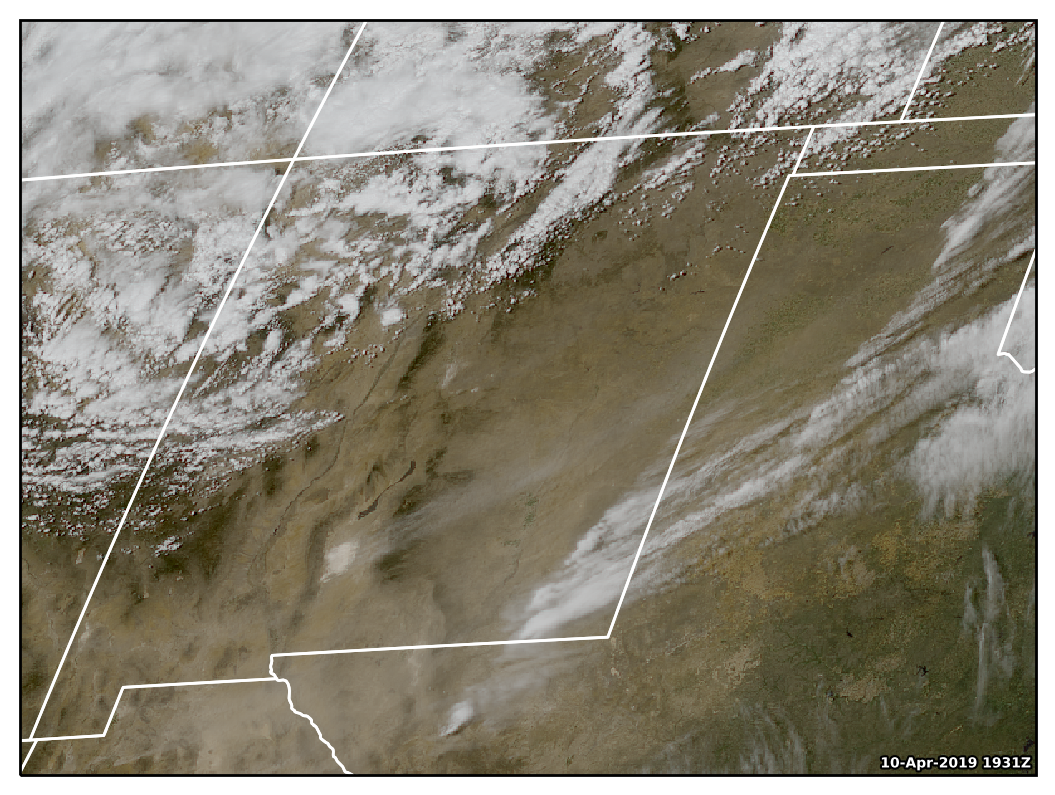

In [63]:
product = "true_color"
for j in range(18,22):
    for i in range(1,61,5):
        filenames = glob.glob(f'/Users/chowdahead/Downloads/GOES_Data/Airmass/TX/{j}/{i}/*ABI-L1b*.nc')
        GOES_RGB(product,filenames,extent=[-109,-101,31,38])#extent=[-114,-109,31,36]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


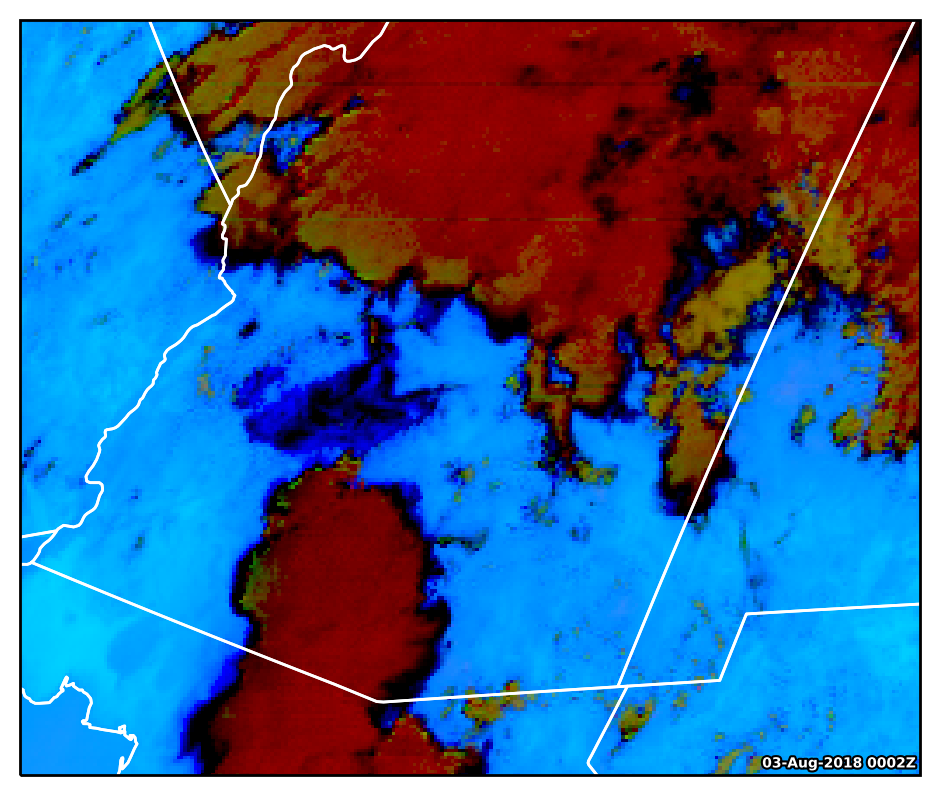

In [57]:
GOES_RGB(product,filenames,extent=[-114,-109,31,36])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


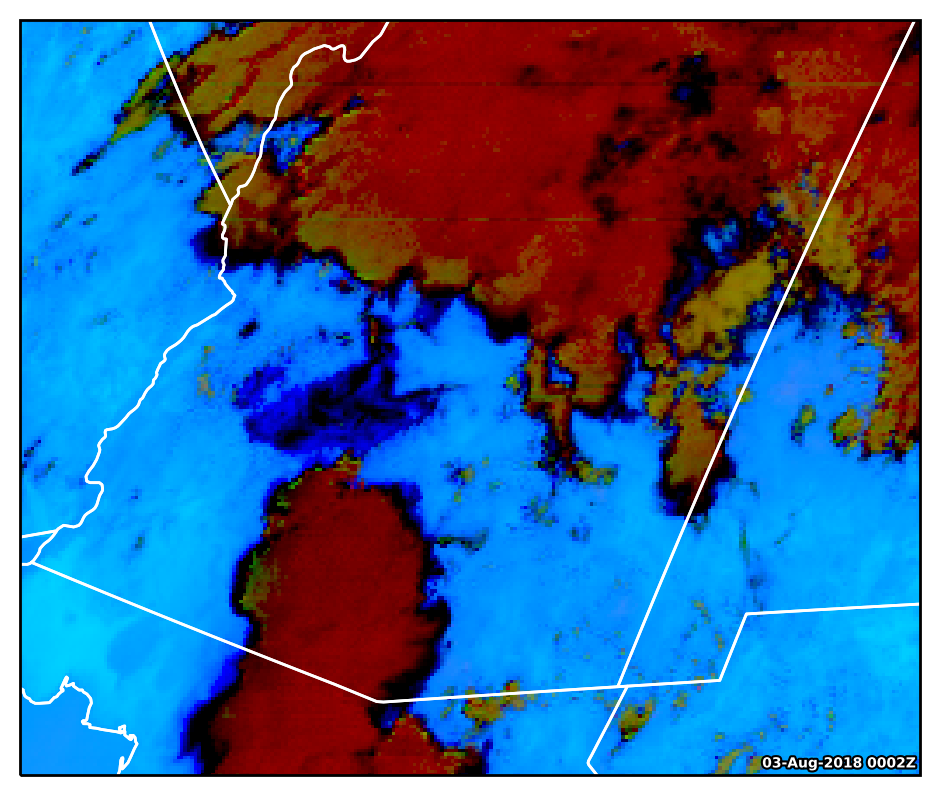

In [17]:
filenames = glob.glob(f'/Users/chowdahead/Downloads/WX_Data/GOES_Data/Dust/00/2/*ABI-L1b*.nc')
GOES_RGB("dust",filenames,extent=[-114,-109,31,36]) #extent=[-108,-104,31,36]

In [12]:
filenames = glob.glob(f'/Users/chowdahead/Downloads/GOES_Data/Dust/02/{2}/*ABI-L1b*.nc')

scn = Scene(reader='abi_l1b', filenames=filenames)

scn.load(["dust"])

new_scn = scn.resample(scn.min_area(), resampler='native')

var = get_enhanced_image(new_scn["dust"]).data
    # Get true color data to use later and reorder the dimensions so matplotlib can use the image
    # Sadly, this operation is not lazy (bad performance) in xarray at the time of writing
var = var.transpose('y', 'x', 'bands')
    
abi_crs = var.attrs['area'].to_cartopy_crs()

In [13]:
abi_crs

_PROJ4Projection(+ellps=WGS84 +a=6378137.0 +b=6356752.31414 +h=35786023.0 +lon_0=-75.0 +proj=geos +sweep=x +units=m +no_defs)

In [17]:
from netCDF4 import Dataset

In [26]:
def GOES_RGB(i,extent=[-114,-109,31,36]):
    
    
    
    GOES16_samples_9 = []
    for name in glob.glob(f"/Users/chowdahead/Downloads/GOES_Data/Dust/02/{i}/*.nc"):
        GOES16_samples_9.append(name)
        #for name in glob.glob(GOES_sample_path+'OR*L2*RadC*C09*G16*s'+Year+str(Julian_Day)+'*.nc'):
        #    GOES16_samples_9.append(name)
        
        GOES16_samples_9 = sorted(GOES16_samples_9)
    #print(list(GOES16_samples_9))
    nc13 = Dataset(GOES16_samples_9[1])
    nc15 = Dataset(GOES16_samples_9[3])

    ch13 = nc13.variables['Rad'][:]
    ch15 = nc15.variables['Rad'][:]

    red = ch15-ch13
    
    fig = plt.figure(figsize=(10, 5), dpi=200)
    sat_h = nc13.variables['goes_imager_projection'].perspective_point_height

    # Satellite longitude
    #sat_lon = nc.variables['goes_imager_projection'].longitude_of_projection_origin

    # Satellite sweep
    #sat_sweep = nc.variables['goes_imager_projection'].sweep_angle_axis

    # The projection x and y coordinates equals
    # the scanning angle (in radians) multiplied by the satellite height (http://proj4.org/projections/geos.html)
    X = nc13.variables['x'][:] * sat_h
    Y = nc13.variables['y'][:] * sat_h

    # Set the projections for plotting 
    proj_var = nc13.variables['goes_imager_projection']
    sat_height = proj_var.perspective_point_height
    central_lon = proj_var.longitude_of_projection_origin
    semi_major = proj_var.semi_major_axis
    semi_minor = proj_var.semi_minor_axis



    globe = ccrs.Globe(semimajor_axis=semi_major, semiminor_axis=semi_minor)
    crs = ccrs.Geostationary(central_longitude=central_lon, satellite_height=sat_height, globe=globe)

    plotcrs = ccrs.LambertConformal(central_latitude=[30, 60], central_longitude=-100)

    # Add the map and set the extent
    ax = plt.subplot(111, projection=abi_crs) 
    ax.set_extent([-114,-109,31,36],ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE.with_scale('10m'), edgecolor='w')
    ax.add_feature(cfeature.STATES.with_scale('10m'), edgecolor='w')


    butt = ax.imshow(red, cmap='Greys',transform=crs,
                    extent=(X.min(), X.max(), Y.min(), Y.max()),origin='upper')#, vmax=1, vmin=0)

    #ax.set_title('Red', fontweight='semibold')
    #ax.axis('off')
    #cbar = plt.colorbar(butt)

    #ax2.imshow(green, cmap='Greens')#, vmax=1, vmin=0)
    #ax2.set_title('Veggie', fontweight='semibold')
    #ax2.axis('off')

    #ax3.imshow(blue, cmap='Blues')#, vmax=1, vmin=0)
    #ax3.set_title('Blue', fontweight='semibold')
    #ax3.axis('off')

    #plt.subplots_adjust(wspace=.02)

    #ax.set_extent([-130,-70,20,55],ccrs.PlateCarree())
    plt.savefig(f"/Users/chowdahead/Desktop/Dust_RGB/02_{i}.png",bbox_inches="tight")
    plt.close()

In [27]:
product = "dust"
for i in range(2,62,5):
    #filenames = glob.glob(f'/Users/chowdahead/Downloads/GOES_Data/Dust/02/{i}/*ABI-L1b*.nc')
    GOES_RGB(i,extent=[-114,-109,31,36])